## Assignment 9
## Perform Clustering using Gaussian Mixture Models in the iris dataset and match the resulted clusters with the original labels with the help of adjusted Rand score (adjusted Rand score).

### 201916006

In [1]:
# Import all necessary liberaries

import numpy as np
import matplotlib.pyplot as plt
from sklearn import cluster, datasets, mixture
import seaborn as sns

In [9]:
# Load Iris Data Set
df = sns.load_dataset("iris")

# Look into the data and get the insights
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


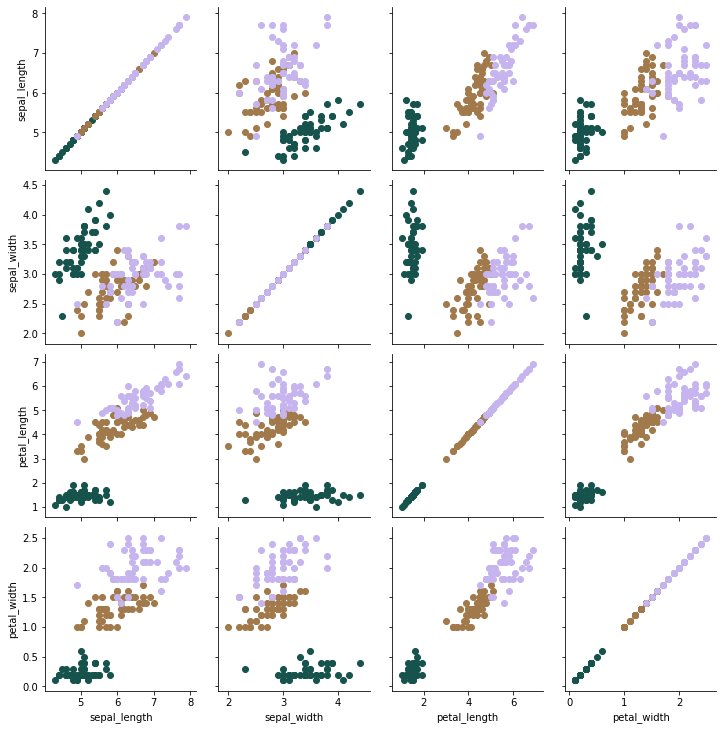

In [10]:
#plotting every pair of features against each other in a subplot, as this data set has 4 features

g = sns.PairGrid(df, hue="species", palette=sns.color_palette("cubehelix", 3), vars=['sepal_length','sepal_width','petal_length','petal_width'])
g.map(plt.scatter)
plt.show()

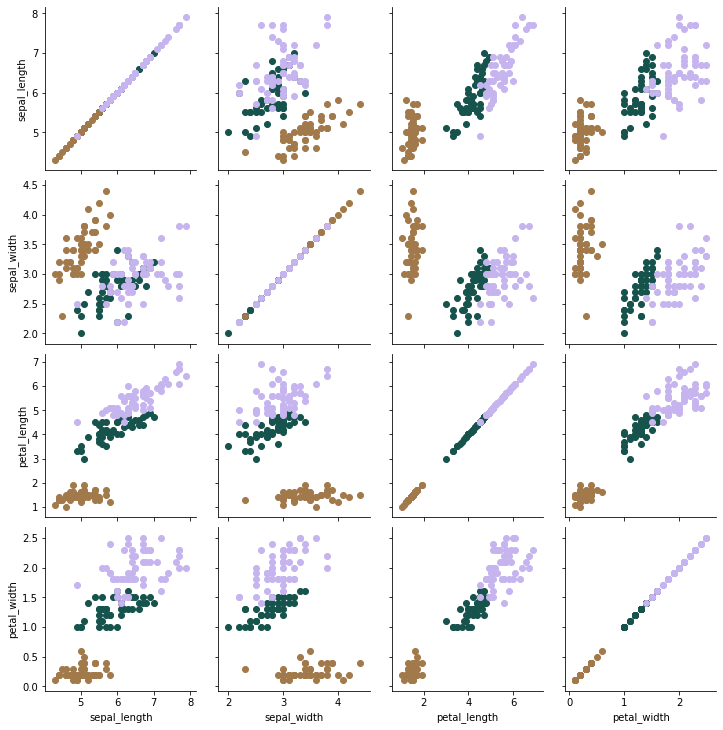

In [11]:
#performing Clustering Using GMM

gmm_iris = mixture.GaussianMixture(n_components=3).fit(iris[['sepal_length','sepal_width','petal_length','petal_width']])
pred_gmm_iris = gmm_iris.predict(iris[['sepal_length','sepal_width','petal_length','petal_width']])

iris['gmm_pred']=pred_gmm_iris
g = sns.PairGrid(iris, hue="gmm_pred", palette=sns.color_palette("cubehelix", 3), vars=['sepal_length','sepal_width','petal_length','petal_width'])
g.map(plt.scatter)
plt.show()

In [12]:
#Importing adjusted Rand Score
from sklearn import metrics

# Get the predicted labels by GMM
df['gmm_pred'] = pred_gmm_iris

 
# labels and the GMM predicted labels iris['species']
iris_gmm_score = metrics.adjusted_rand_score(df['species'],pred_gmm_iris)

# Print the score
iris_gmm_score


0.9038742317748124